# Linear Regression Code

## 데이터 

In [4]:
import numpy as np

from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Boston 데이터셋은 506개의 데이터와 13개의 feature로 이루어져 있으며 target값은 보스턴의 집값을 나타낸다.

In [6]:
boston.data.shape

(506, 13)

In [7]:
boston.feature_names #범죄율, 비소매상업지역 면적비율, 주택당 방 수, 인구 중 흑인 비율, 학생/교사 비율, 재산세율 등...

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

## simple linear regression model

Boston 지역의 주택 가격 데이터셋에서 한가지 feature만을 가지고 simple linear regression model을 만들어 보자.

### 데이터

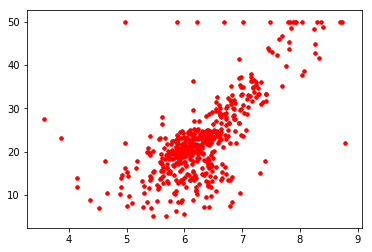

In [10]:
import matplotlib.pyplot as plt
plt.scatter(boston.data[:, 5], boston.target, color='r', s=10) #boston.data[:, 5]는 6번째 feature만 뽑아낸 데이터이다.
plt.show()

데이터에서 6번째 feature인 RM(주택 당 방 수)에 따른 주택 가격을 산포도로 나타내었다. 이 feature 하나만 가지고 주택가격을 예측해보자.

###  입력 데이터 준비

In [41]:
from sklearn.linear_model import LinearRegression
x = boston.data[:, 5]
y = boston.target

In [40]:
print('size of x:{}'.format(x.shape))

size of x:(506,)


linear regression model에서 input은 각 행이 벡터로 구성된 (506,1)의 2차원 배열이므로 2차원 배열로 바꿔 주어야 한다.

In [34]:
import numpy as np
x_1 = np.atleast_2d(x)
x_1.shape

(1, 506)

In [36]:
x_2 = np.transpose(x_1) #행벡터로 된 x를 열벡터로 바꿔준다.
x_2.shape

(506, 1)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_2,y,random_state=1)

###  입력 데이터 준비

In [44]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###  알고리즘 학습(훈련)

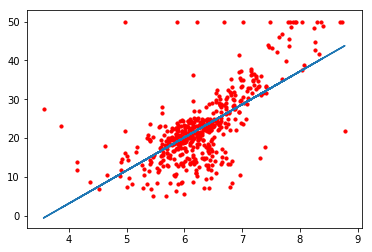

In [48]:
y_predicted = lr.predict(X_train)
plt.plot(X_train, y_predicted)
plt.scatter(boston.data[:, 5], boston.target, color='r', s=10)
plt.show()

학습된 선형 모델을 확인해보자

In [52]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 8.49980808]
lr.intercept_: -30.827875945593227


즉, 선형모델은 y=-30.3279+8.4998x로 학습되었다.

### 모델 검증

In [54]:
print("훈련 데이터 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 데이터 점수: 0.43
테스트 데이터 점수: 0.60


여기서 score는 앞에서 설명한 $R^2$를 말한다. 여기서 보면 학습 데이터의 $R^2$값이 테스트 데이터의 $R^2$보다 낮게 나온 것은 이 학습이 과대적합이 아니라 과소적합 상태인 것을 알 수 있다. 이 경우에는 13가지 설명변수 중 하나만을 사용해 데이터를 설명한 경우니 당연한 결과이다.

# Multiple Linear Regression

In [66]:
x = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
print("훈련 데이터 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 데이터 점수: 0.72
테스트 데이터 점수: 0.78


이번 역시 훈련데이터의 $R^2$이 더 작으므로 과소적합 상태이다. 그래서 더 고차원의 모델로 학습시키기 위해 기존의 설명변수들을 2개씩 조합 한 설명변수를 추가시킨 extended boston데이터를 이용해 보자.

In [69]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()

eX_train, eX_test, ey_train, ey_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(eX_train, ey_train)

In [73]:
print('X_train.shape :{}, eX_train.shape: {}'.format(X_train.shape,eX_train.shape))

X_train.shape :(379, 13), eX_train.shape: (379, 104)


In [75]:
print("훈련 데이터 점수: {:.2f}".format(lr.score(eX_train, ey_train)))
print("테스트 데이터 점수: {:.2f}".format(lr.score(eX_test, ey_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


이번에는 훈련 데이터의  $R^2$이 테스트 데이터의  $R^2$ 값보다 많이 크기떄문에 과대적합된 상태이다. 이제 regularization을 이용해 과대적합 문제를 해결해보자.

## Ridge regression_릿지회귀

In [78]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(eX_train, ey_train)
print("훈련 데이터 점수: {:.2f}".format(ridge.score(eX_train, ey_train)))
print("테스트 데이터 점수: {:.2f}".format(ridge.score(eX_test, ey_test)))

훈련 데이터 점수: 0.89
테스트 데이터 점수: 0.75


훈련 데이터의  $R^2$ 값은 Linear regression보다 낮지만 테스트 데이터의  $R^2$ 값은 증가함을 볼 수 있다. 

이번에는 Ridge regression의 trade-off 상수인 $\lambda$를 조정해보자. $\lambda$는 기본적으로 1로 설정되어 있지만 이를 조정할 수 있다.

In [83]:
ridge10 = Ridge(alpha=10).fit(eX_train, ey_train)
print("훈련 데이터 점수: {:.2f}".format(ridge10.score(eX_train, ey_train)))
print("테스트 데이터 점수: {:.2f}".format(ridge10.score(eX_test, ey_test)))

훈련 데이터 점수: 0.79
테스트 데이터 점수: 0.64


In [84]:
ridge01 = Ridge(alpha=0.1).fit(eX_train, ey_train)
print("훈련 데이터 점수: {:.2f}".format(ridge01.score(eX_train, ey_train)))
print("테스트 데이터 점수: {:.2f}".format(ridge01.score(eX_test, ey_test)))

훈련 데이터수: 0.93
테스트 데이터 점수: 0.77


앞에서 배운 내용처럼 $\lambda$가 커지면 훈련데이터의 성능은 나빠지지만 모델을 일반화 하는데 도움을 주고 
반대로 $\lambda$가 작아지면 훈련 데이터의 성능은 좋지만 모델을 일반화되기 어렵다.

## Lasso regression_라쏘회귀 

Lasso는 Ridge와 비슷하게 계수를 작게 만들 뿐만아니라 몇 개의 설명변수 외의 계수는 모두 0을 만들기 때문에 설명변수 중 일부분만 중요하다면 Lasso가 더 유용하다.

In [89]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 데이터 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 데이터 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 데이터 개수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 데이터 점수: 0.65
테스트 데이터 점수: 0.66
사용한 데이터 개수: 9
